In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [47]:
df = pd.read_excel('TrainExer 3-5.xlsx')

In [48]:
df.head()

,Year,Index,Dividends,Riskfree,LogEqPrem,BookMarket,NTIS,DivPrice,EarnPrice,Inflation
0,1927,17.66,0.77,0.0317,0.280823,0.374689,0.073955,-3.132667,-2.766942,-0.021176
1,1928,24.35,0.85,0.0426,0.313824,0.259667,0.042639,-3.355051,-2.870448,-0.009793
2,1929,21.45,0.97,0.0303,-0.112428,0.338458,0.165576,-3.096184,-2.589490,0.001830
3,1930,15.34,0.98,0.0148,-0.288025,0.554745,0.131525,-2.750667,-2.760923,-0.060665
4,1931,8.12,0.82,0.0241,-0.563742,1.170732,-0.011032,-2.292781,-2.588626,-0.095711


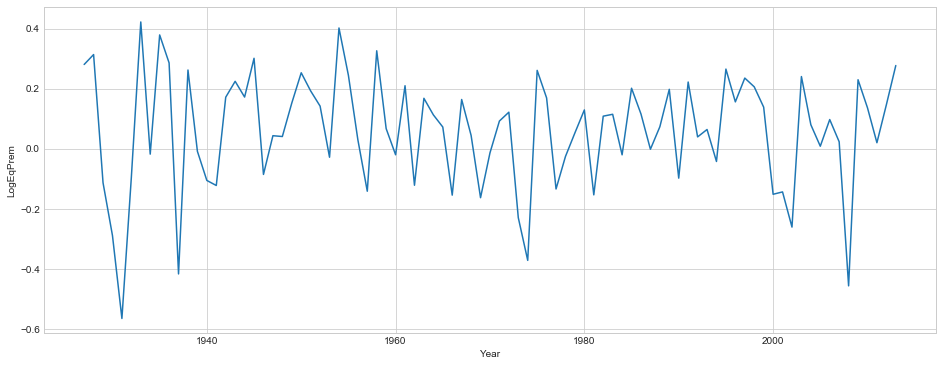

In [49]:
plt.figure(figsize=(16,6))
plt.plot(df['Year'], df['LogEqPrem'])
plt.xlabel('Year')
plt.ylabel('LogEqPrem')

## Regression using 5 explanatory variables

In [4]:
import statsmodels.api as sm

/anaconda/envs/research/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [6]:
X = pd.concat([df['BookMarket'], df['NTIS'], df['DivPrice'], df['EarnPrice'], df['Inflation']], axis=1)
y = df['LogEqPrem']
X = sm.add_constant(X)

In [7]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              LogEqPrem   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1.969
Date:                Sun, 08 Apr 2018   Prob (F-statistic):             0.0920
Time:                        15:59:32   Log-Likelihood:                 25.294
No. Observations:                  87   AIC:                            -38.59
Df Residuals:                      81   BIC:                            -23.79
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2344      0.385      0.610      0.544      -0.531       0.999
BookMarket    -0.1761      0.154     -1.143      0.257      -0.483       0.131
NTIS          -0.1456      0.819     -0.178      0.859      -1.775       1.484
DivPrice      -0.1199      0.098     -1.219      0.226      -0.315       0.076
EarnPrice      0.1672      0.085      1.970      0.052      -0.002       0.336
Inflation     -0.5669      0.587     -0.965      0.337      -1.736       0.602
==============================================================================
Omnibus:                        1.436   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.488   Jarque-Bera (JB):                1.011
Skew:                          -0.254   Prob(JB):                        0.603
Kurtosis:                       3.142   Cond. No.                         189.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Regression using only `BookMarket` variable

In [29]:
X = df['BookMarket']
y = df['LogEqPrem']
X = sm.add_constant(X)

In [30]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              LogEqPrem   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     5.749
Date:                Sun, 08 Apr 2018   Prob (F-statistic):             0.0187
Time:                        17:13:37   Log-Likelihood:                 23.150
No. Observations:                  87   AIC:                            -42.30
Df Residuals:                      85   BIC:                            -37.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1659      0.049      3.411      0.001       0.069       0.263
BookMarket    -0.1851      0.077     -2.398      0.019      -0.339      -0.032
==============================================================================
Omnibus:                        7.691   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                7.155
Skew:                          -0.649   Prob(JB):                       0.0279
Kurtosis:                       3.536   Cond. No.                         5.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
y_pred = model.predict(X)

In [37]:
df['y_pred_2'] = y_pred**2
e0 = sum((y - y_pred)**2)
print(e0)

2.99171449101


In [38]:
X = pd.concat([df['BookMarket'], df['y_pred_2']], axis=1)
X = sm.add_constant(X)

In [39]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              LogEqPrem   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     4.680
Date:                Sun, 08 Apr 2018   Prob (F-statistic):             0.0118
Time:                        17:15:31   Log-Likelihood:                 24.899
No. Observations:                  87   AIC:                            -43.80
Df Residuals:                      84   BIC:                            -36.40
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3417      0.106      3.219      0.002       0.131       0.553
BookMarket    -0.3758      0.128     -2.939      0.004      -0.630      -0.122
y_pred_2     -11.2543      6.063     -1.856      0.067     -23.311       0.802
==============================================================================
Omnibus:                        6.823   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.299
Skew:                          -0.637   Prob(JB):                       0.0429
Kurtosis:                       3.339   Cond. No.                         355.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
y_pred = model.predict(X)
e1 = sum((y - y_pred)**2) # unrestricted model
print(e1)

2.87382953372


$$F = \frac{(e0 - e1)/g}{e1/(n - k)}$$

In [44]:
F = ((e0 - e1)/1)/(e1/(87 - 3))
print(F)

3.44569373243


H0 is not rejected. We do not reject the hypothesis that the model is a linear regression model.